In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.linalg as LA
from scipy.signal import dlsim, butter, lfilter, welch
import scienceplots

import opentorsion as ot

In [2]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

In [3]:
def testbench_powertrain():
    inertias = np.array([7.94e-4,
                         3.79e-6,
                         3.00e-6,
                         2.00e-6,
                         7.81e-3,
                         2.00e-6,
                         3.29e-6,
                         5.01e-5,
                         6.50e-6,
                         5.65e-5,
                         4.27e-6,
                         3.25e-4,
                         1.20e-4,
                         1.15e-5,
                         1.32e-4,
                         4.27e-6,
                         2.69e-4,
                         1.80e-4,
                         2.00e-5,
                         2.00e-4,
                         4.27e-6,
                         4.95e-2])

    stiffnesses = np.array([1.90e5,
                            6.95e3,
                            90.00,
                            90.00,
                            90.00,
                            90.00,
                            94.064,
                            4.19e4,
                            5.40e3,
                            4.19e4,
                            1.22e3,
                            4.33e4,
                            3.10e4,
                            1.14e3,
                            3.10e4,
                            1.22e4,
                            4.43e4,
                            1.38e5,
                            2.00e4,
                            1.38e5,
                            1.22e4])

    damping = np.array([8.08,
                        0.29,
                        0.24,
                        0.24,
                        0.24,
                        0.24,
                        0.00,
                        1.78,
                        0.23,
                        1.78,
                        0.52,
                        1.84,
                        1.32,
                        0.05,
                        1.32,
                        0.52,
                        1.88,
                        5.86,
                        0.85,
                        5.86,
                        0.52])

    external_damping = np.array([0.0030,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0.0042,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0.0042,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0.2400])

    shafts, disks, gears = [], [], []

    disks.append(ot.Disk(0, I=inertias[0], c=external_damping[0]))
    shafts.append(ot.Shaft(0, 1, k=stiffnesses[0], c=damping[0]))
    disks.append(ot.Disk(1, I=inertias[1], c=external_damping[1]))
    shafts.append(ot.Shaft(1, 2, k=stiffnesses[1], c=damping[1]))
    disks.append(ot.Disk(2, I=inertias[2], c=external_damping[2]))
    shafts.append(ot.Shaft(2, 3, k=stiffnesses[2], c=damping[2]))
    disks.append(ot.Disk(3, I=inertias[3], c=external_damping[3]))
    shafts.append(ot.Shaft(3, 4, k=stiffnesses[3], c=damping[3]))
    disks.append(ot.Disk(4, I=inertias[4], c=external_damping[4]))
    shafts.append(ot.Shaft(4, 5, k=stiffnesses[4], c=damping[4]))
    disks.append(ot.Disk(5, I=inertias[5], c=external_damping[5]))
    shafts.append(ot.Shaft(5, 6, k=stiffnesses[5], c=damping[5]))
    disks.append(ot.Disk(6, I=inertias[6], c=external_damping[6]))
    shafts.append(ot.Shaft(6, 7, k=stiffnesses[6], c=damping[6]))
    disks.append(ot.Disk(7, I=inertias[7], c=external_damping[7]))
    shafts.append(ot.Shaft(7, 8, k=stiffnesses[7], c=damping[7]))
    disks.append(ot.Disk(8, I=inertias[8], c=external_damping[8]))
    shafts.append(ot.Shaft(8, 9, k=stiffnesses[8], c=damping[8]))
    disks.append(ot.Disk(9, I=inertias[9], c=external_damping[9]))
    shafts.append(ot.Shaft(9, 10, k=stiffnesses[9], c=damping[9]))
    disks.append(ot.Disk(10, I=inertias[10], c=external_damping[10]))
    shafts.append(ot.Shaft(10, 11, k=stiffnesses[10], c=damping[10]))
    disks.append(ot.Disk(11, I=inertias[11], c=external_damping[11]))
    gears.append(gear_up := ot.Gear(11, 0, R=1))

    gears.append(ot.Gear(12, I=0, R=3, parent=gear_up))
    shafts.append(ot.Shaft(12, 13, k=stiffnesses[11], c=damping[11]))
    disks.append(ot.Disk(13, I=inertias[12], c=external_damping[12]))
    shafts.append(ot.Shaft(13, 14, k=stiffnesses[12], c=damping[12]))
    disks.append(ot.Disk(14, I=inertias[13], c=external_damping[13]))
    shafts.append(ot.Shaft(14, 15, k=stiffnesses[13], c=damping[13]))
    disks.append(ot.Disk(15, I=inertias[14], c=external_damping[14]))
    shafts.append(ot.Shaft(15, 16, k=stiffnesses[14], c=damping[14]))
    disks.append(ot.Disk(16, I=inertias[15], c=external_damping[15]))
    shafts.append(ot.Shaft(16, 17, k=stiffnesses[15], c=damping[15]))
    disks.append(ot.Disk(17, I=inertias[16], c=external_damping[16]))
    gears.append(gear_low := ot.Gear(17, I=0, R=1))

    gears.append(ot.Gear(18, I=0, R=4, parent=gear_low))
    shafts.append(ot.Shaft(18, 19, k=stiffnesses[16], c=damping[16]))
    disks.append(ot.Disk(19, I=inertias[17], c=external_damping[17]))
    shafts.append(ot.Shaft(19, 20, k=stiffnesses[17], c=damping[17]))
    disks.append(ot.Disk(20, I=inertias[18], c=external_damping[18]))
    shafts.append(ot.Shaft(20, 21, k=stiffnesses[18], c=damping[18]))
    disks.append(ot.Disk(21, I=inertias[19], c=external_damping[19]))
    shafts.append(ot.Shaft(21, 22, k=stiffnesses[19], c=damping[19]))
    disks.append(ot.Disk(22, I=inertias[20], c=external_damping[20]))
    shafts.append(ot.Shaft(22, 23, k=stiffnesses[20], c=damping[20]))
    disks.append(ot.Disk(23, I=inertias[21], c=external_damping[21]))

    assembly = ot.Assembly(shaft_elements=shafts, disk_elements=disks, gear_elements=gears)
    _, f, _ = assembly.modal_analysis()
    print("Eigenfrequencies (Hz): ", f/(2*np.pi))

    return assembly

In [4]:
def O(A, C, n):
    '''
    Create the extended observability matrix used in the data equation.

    Parameters:

    A : numpy.ndarray
        The state matrix of the state-space system
    C : numpy.ndarray
        The observation matrix of the state-space system
    n : float
        number of measurements

    Returns:

    O : numpy.ndarray, shape(n, number of state variables)
        The extended observability matrix
    '''
    A_power = np.copy(A)
    O = np.vstack((np.copy(C), C @ A))

    for k in range(n-2):
        A_power = A_power @ A
        O = np.vstack((O, C @ A_power))

    return O


def gamma(A, B, C, n):
    '''
    Create the impulse response matrix used in the data equation.

    Parameters:

    A : numpy.ndarray
        The state matrix of the state-space system
    B : numpy.ndarray
        The input matrix of the state-space system
    C : numpy.ndarray
        The observation matrix of the state-space system
    n : float
        number of measurements

    Returns:

    gamma : numpy.ndarray, shape(n*number of state variables, n*number of state variables)
        The impulse response matrix
    '''
    A_power = np.copy(A)
    Z = np.zeros((C @ B).shape)

    # first column
    gamma_column_first = np.vstack((
        Z,
        C @ B,
        C @ A @ B
    ))
    for _ in range(n-3):
        A_power = A_power @ A
        gamma_column_first = np.vstack((gamma_column_first, C @ A_power @ B))

    # build complete matrix, column by column, from left to right
    gamma = np.copy(gamma_column_first)
    current_column = 1
    for _ in range(1, n):
        gamma_rows = Z

        # first add zero matrices
        for _ in range(current_column):
            gamma_rows = np.vstack((gamma_rows, Z))

        # then add the impulse responses
        A_power2 = np.copy(A)

        if current_column < (n-2):
            gamma_rows = np.vstack((
                gamma_rows,
                C @ B,
                C @ A @ B # these must not be added to the last and the second to last columns
            ))

        if current_column == (n-2):
            gamma_rows = np.vstack((
                gamma_rows,
                C @ B # this has to be added to the end of the second to last column
            ))

        for _ in range(n-current_column-3):
            A_power2 = A_power2 @ A
            gamma_rows = np.vstack((gamma_rows, C @ A_power2 @ B))

        # add column on the right hand side
        gamma = np.hstack((gamma, gamma_rows))
        current_column += 1

    return gamma


def second_difference_matrix(n, m):
    D2 = np.eye(n*m) - 2*np.eye(n*m, k=2) + np.eye(n*m, k=4)

    # delete incomplete rows
    D2 = D2[:-2*m, :]

    return D2

In [5]:
# parameters for simulated excitations
fs = 1000  # sampling frequency
t_sim = np.arange(0,10,1/fs)  # timesteps
dt_sim = np.mean(np.diff(t_sim))  # timestep length

In [6]:
def impulse_excitation(sim_times, plot=False):
    """
    Parameters:
    
    sim_times : numpy.ndarray
        Timesteps of the simulation.
        
    Returns:
    
    U_imp : numpy.ndarray
        Input torque matrix. Rows correspond to timesteps, first column has the motor torque,
        second column has the propeller torque.
    """
    U_imp = np.zeros((len(sim_times), 2))

    e1 = np.random.normal(0, .1, U_imp.shape[0])
    e2 = np.random.normal(0, .1, U_imp.shape[0])

    one_hit = -np.hstack((np.linspace(0, 0.34, 7), np.linspace(0.38, 0.64, 7), np.linspace(0.67, 0.87, 7), np.linspace(0.9, 0.98, 7)))

    U_imp[:,0] += 2.7 + e1
    U_imp[:,1] += e2
    U_imp[3200:3228,1] += one_hit*10
    U_imp[3228:3228+28,1] += np.flip(one_hit*10)
    U_imp[5200:5228,1] += one_hit*10
    U_imp[5228:5228+28,1] += np.flip(one_hit*10)
    U_imp[8200:8228,1] += one_hit*10
    U_imp[8228:8228+28,1] += np.flip(one_hit*10)

    if plot:
        plt.subplot(211)
        plt.plot(sim_times, U_imp[:,0], label='Driving motor setpoint', color='blue')
        plt.ylabel('Torque (Nm)')
        plt.legend()

        plt.subplot(212)
        plt.plot(sim_times, U_imp[:,1], label='Loading motor setpoint', color='blue')
        plt.xlabel('Time (s)')
        plt.ylabel('Torque (Nm)')
        plt.legend()
        plt.tight_layout()

        plt.show()

    return U_imp

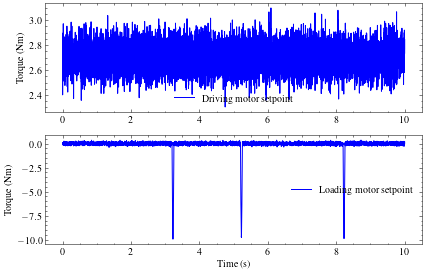

In [7]:
impulse_sim = impulse_excitation(t_sim, plot=True)

In [8]:
def get_testbench_state_space(dt):
    """
    This function returns the discrete-time state-space matrices of the testbench model.
    """
    assembly = testbench_powertrain()
    Ac, Bc, _, _ = assembly.state_space()
    X = assembly.X
    X_inv = LA.pinv(X)
    AcX = X @ Ac @ X_inv
    BcX_full = X @ Bc
    BcX = np.vstack((BcX_full[:,0], BcX_full[:,-1])).T

    A, B = assembly.continuous_2_discrete(AcX, BcX, dt)
    C = np.zeros((4, A.shape[0]))
    C[2,8] += 1
    C[3,18] += 1
    C[0,27] += 1
    C[1,28] += 1

    D = np.zeros((C.shape[0], BcX.shape[1]))

    return A, B, C, D

In [9]:
dt = np.mean(np.diff(t_sim))
A, B, C, D = get_testbench_state_space(dt)
C_est = np.zeros((3, A.shape[0]))
C_est[2,8] += 1
C_est[0,27] += 1
C_est[1,28] += 1
D_est = np.zeros((C_est.shape[0], B.shape[1]))
ss = (A, B, C_est, D_est)
ss2 = (A, B, C, D)

Eigenfrequencies (Hz):  [    0.         0.        28.6459   -28.6459    37.4325   -37.4325
     0.         0.        69.6241   -69.6241     0.       300.4419
  -300.4419   444.6291  -444.6291  1517.2156 -1517.2156  1663.9715
 -1663.9715  1792.1722 -1792.1722     0.      2728.6658 -2728.6658
  2766.1171 -2766.1171     0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]


In [10]:
def progressbar(it, prefix="", size=60, out=sys.stdout, show_print=False):
    """
    A function used to display a progress bar in the console.
    """
    count = len(it)
    def show(j):
        x = int(size*j/count)
        print(f"{prefix}[{u'█'*x}{('.'*(size-x))}] {j}/{count}", end='\r', file=out, flush=True)
    show(0)
    for i, item in enumerate(it):
        yield item
        show(i+1)
    if show_print:
        print("\n", flush=True, file=out)

In [11]:
def get_data_equation_matrices(A, B, C, D, n, bs):
    D2 = second_difference_matrix(bs, B.shape[1])
    O_mat = O(A, C, bs)
    G = gamma(A, B, C, bs)
    L = np.eye(bs*B.shape[1])

    return O_mat, G, D2, L

# Regularized WLS for estimating unknown input and initial state

We can formulate the estimation of unknown input torque and initial state as

\begin{equation}
      \begin{aligned}
      \underset{u,v}{\text{minimize}}\quad& L(u) + v^\top W_{\mathrm{R}} v \\
      \text{subject to} \quad& v = y - H\varphi,
    \end{aligned}
\end{equation}

where $H = \left[ \mathcal{O} \text{ } \Gamma \right] $, $\varphi = \left[ x(0)^\top u(k)^\top \right]^\top $, $W_{\mathrm{R}} = I_{N} \otimes R^{-1}$ and $L(u)$ is a regularization function.

We can assume the input varies smoothly, for input torques $u_{\mathrm{m}}$ from the motor and $u_{\mathrm{p}}$ from the propeller, the regularization term is

$\begin{equation}
        \Delta_2 u = 
        \begin{bmatrix}
            1 & 0 & -2 & 0 & 1 & & \\
              & 1 & 0 & -2 & 0 & 1 &\\
              &  &\ddots &\ddots &\ddots &\ddots & \\
              &  & 1 & 0 & -2 & 0 & 1 & \\
              &  & & 1 & 0 & -2 & 0 & 1
        \end{bmatrix}        
        \begin{bmatrix}
            u_{\mathrm{m}}(0) \\
            u_{\mathrm{p}}(0) \\
            \vdots \\
            u_{\mathrm{m}}(k) \\
            u_{\mathrm{p}}(k)
        \end{bmatrix}.
\end{equation}$

For rotating mechanical systems it is feasible to assume that the states of coupled elements, e.g., the rotating speed of two adjacent lumped masses, do not differ considerably from each other. Thus, a regularization term for the unknown initial state $x(0)$ can be defined in a similar fashion as for the input, by constraining the first difference of the state variables of $x(0)$.

$\begin{equation}
        \Delta_1 x(0) = 
        \begin{bmatrix}
            1 & -1 & & & & & \\
              & 1 & -1 & & & & \\
              & & \ddots & \ddots & & \\
              & & & 1 & -1 & & \\
              & & & & 1 & -1 & \\
              & & & & & \ddots & \ddots
         \end{bmatrix}
         \begin{bmatrix}
             \tau_{\mathrm{m}}(0) \\
             \tau_2(0) \\
             \vdots \\
             \dot{\theta}_1(0) \\
             \dot{\theta}_2(0) \\
             \vdots
        \end{bmatrix}.
\end{equation}$

It should be noted that there are zero rows in $\Delta_1$ where the aforementioned assumption does not hold, i.e., at gear locations and where the physical state quantities are different to ensure, for example, that speed is not subtracted from torque.

The regularization function can then be formulated as

$\begin{equation}
    L(u) = \biggl\| \begin{bmatrix}\lambda_1 \Delta_1 & 0 \\ 0 & \lambda_2 \Delta_2\end{bmatrix} \begin{bmatrix}x(0) \\ u\end{bmatrix} \biggl\|^2_2 = \| \Delta(\lambda_1, \lambda_2) \varphi \|^2_2,
\end{equation}$

where $\lambda_1$ and $\lambda_2$ are scalars which can be used to scale how strongly the regularization is enforced.

The regularized WLS problem has an analytical solution
\begin{equation}
    \hat{\varphi} = \left( \Delta(\lambda_1,\lambda_2)^{\top} \Delta(\lambda_1,\lambda_2) + H^\top W_\mathrm{R} H \right)^{-1}H^\top W_\mathrm{R} y,
    \label{eq:optimization2_analytic}
\end{equation}
where $\hat{\varphi}$ is an estimate of the initial state and input torques.

In [12]:
def ell2_analytical(ss, ss2, measurements, batch_size, overlap, times, lam1=0, lam2=0.1, use_trend_filter=False, print_bar=True):
    """
    Analytical solution of the l2 regularized LS problem.
    Minimizes the sum of squared residuals, including an l2 constraint.
    """
    dt = np.mean(np.diff(times))
    n = len(times)
    bs = batch_size + 2*overlap
    loop_len = int(n/batch_size)

    A, B, C, D = ss  # state space model
    O_mat, G, D2, L = get_data_equation_matrices(A, B, C, D, n, bs)  # data equation matrices

    if use_trend_filter:
        regul_matrix = D2 # regularization matrix
    else:
        regul_matrix = L

    H = np.hstack([O_mat, G])  # extended observation and impulse response matrix
    
    # initial state regularization, Z: no regularization, I: yes regularization
    Z = np.zeros((regul_matrix.shape[0], O_mat.shape[1]))
    S = (np.eye(O_mat.shape[1])-np.eye(O_mat.shape[1], k=1))
    # initial state regularization is set to zero at gear locations and
    # where state quantity changes (tau -> theta_dot)
    S[10] *= 0  # gear 1 torque
    S[15] *= 0  # gear 2 torque
    S[20] *= 0  # tau_n - theta_dot_1
    S[32] *= 0  # gear 1 speed
    S[37] *= 0  # gear 2 speed
    Id = np.vstack([
        S,
        np.zeros((regul_matrix.shape[0]-O_mat.shape[1], O_mat.shape[1]))
    ])
    M = np.vstack([
        lam1*(np.hstack([Id, np.zeros_like(regul_matrix)])),
        lam2*(np.hstack([Z, regul_matrix]))
    ])  # extended regularization matrix
    
    # measurement noise covariance matrix
    R = np.diag([0.05, 0.10, 0.20])
    #R = np.diag([10, 10, 10])
    R_inv = LA.inv(R)
    I = np.eye(bs)
    # measurement noise covariance assembled as a diagonal block matrix
    WR = np.kron(I, R_inv)
    #WQ = np.zeros_like()

    LS = LA.inv(H.T @ WR @ H + (M.T @ M)) @ H.T @ WR
    
    input_estimates = []
    state_estimates = []

    A2, B2, C2, D2 = ss2 # for state reconstruction
    O_mat2, G2, D22, L2 = get_data_equation_matrices(A2, B2, C2, D2, n, bs)  # data equation matrices
    
    for i in progressbar(range(loop_len), "Calculating estimates: ", loop_len, show_print=print_bar):
        if i == 0:
            batch = measurements[:bs,:]
        #elif i == loop_len-1:
            #batch = np.zeros((bs, measurements.shape[1]))
            # zero padding to finish estimation loop correctly
        else:
            batch = measurements[i*batch_size-overlap:(i+1)*batch_size+overlap,:]

        y = batch.reshape(-1,1)

        estimate = LS @ y
        input_estimates.append(estimate)
        
        state_estimate = O_mat2 @ estimate[:43].reshape(-1,1) + G2 @ estimate[43:].reshape(-1,1)
        state_estimates.append(state_estimate)

    return input_estimates, state_estimates

In [13]:
def ell2_analytical_no_xreg(ss, measurements, batch_size, overlap, times, lam1=0, lam2=0.1, use_trend_filter=False, print_bar=True):
    """
    Analytical solution of the l2 regularized LS problem.
    Minimizes the sum of squared residuals, including an l2 constraint.
    """
    dt = np.mean(np.diff(times))
    n = len(times)
    bs = batch_size + 2*overlap
    loop_len = int(n/batch_size)

    A, B, C, D = ss  # state space model
    O_mat, G, D2, L = get_data_equation_matrices(A, B, C, D, n, bs)  # data equation matrices

    if use_trend_filter:
        regul_matrix = D2 # regularization matrix
    else:
        regul_matrix = L
    
    # measurement noise covariance matrix
    R = np.diag([0.05, 0.10, 0.20])
    #R = np.diag([10, 10, 10])
    R_inv = LA.inv(R)
    I = np.eye(bs)
    # measurement noise covariance assembled as a diagonal block matrix
    WR = np.kron(I, R_inv)
    #WQ = np.zeros_like()

    LS = LA.inv(G.T @ WR @ G + lam2*(regul_matrix.T @ regul_matrix)) @ G.T @ WR
    
    input_estimates = []

    for i in progressbar(range(loop_len), "Calculating estimates: ", loop_len, show_print=print_bar):
        if i == 0:
            batch = measurements[:bs,:]
        #elif i == loop_len-1:
            #batch = np.zeros((bs, measurements.shape[1]))
            # zero padding to finish estimation loop correctly
        else:
            batch = measurements[i*batch_size-overlap:(i+1)*batch_size+overlap,:]

        y = batch.reshape(-1,1)

        estimate = LS @ y

        input_estimates.append(estimate)

    return input_estimates

# Pareto front for $\lambda_1$ and $\lambda_2$

In [14]:
def pareto_front(ss, measurements, times, lambda1, lambdas2, use_trend=False):
    dt = np.mean(np.diff(times))
    batch_size = len(times)
    bs = batch_size
    overlap = 0
    n = len(times)

    A, B, C, D = ss
    O_mat, G, D2, L = get_data_equation_matrices(A, B, C, D, n, batch_size)

    if use_trend:
        regul_matrix = D2
    else:
        regul_matrix = L
        
    H = np.hstack([O_mat, G])  # extended observation and impulse response matrix
    
    # initial state regularization, Z: no regularization, I: yes regularization
    Z = np.zeros((regul_matrix.shape[0], O_mat.shape[1]))
    S = (np.eye(O_mat.shape[1])-np.eye(O_mat.shape[1], k=1))
    # initial state regularization is set to zero at gear locations and
    # where state quantity changes (tau -> theta_dot)
    S[10] *= 0  # gear 1 torque
    S[15] *= 0  # gear 2 torque
    S[20] *= 0  # tau_n - theta_dot_1
    S[32] *= 0  # gear 1 speed
    S[37] *= 0  # gear 2 speed
    Id = np.vstack([
        S,
        np.zeros((regul_matrix.shape[0]-O_mat.shape[1], O_mat.shape[1]))
    ])
    
    # measurement noise covariance matrix
    R = np.diag([0.05, 0.10, 0.20])
    R_inv = LA.inv(R)
    I = np.eye(bs)
    # measurement noise covariance assembled as a diagonal block matrix
    WR = np.kron(I, R_inv)

    input_estimates = []

    y = measurements.reshape(-1,1)
    
    for i in progressbar(range(len(lambdas2)), "Calculating estimates :", len(lambdas2)):
        M = np.vstack([
            lambda1*(np.hstack([Id, np.zeros_like(regul_matrix)])),
            lambdas2[i]*(np.hstack([Z, regul_matrix]))
        ])  # extended regularization matrix
        LS = LA.inv(H.T @ WR @ H + (M.T @ M)) @ H.T @ WR
        estimates = LS @ y
        input_estimates.append(estimates)
        #print("max. input value", np.max(estimates[43:]))
        #print("max. shaft torque value: ", np.max(estimates[:21]))
        #print("max. shaft speed value: ", np.max(estimates[21:43]))

    norm, res_norm = [], []
    for i in range(len(lambdas2)):
        res_norm.append(np.linalg.norm(y - H @ input_estimates[i]))
        norm.append(np.linalg.norm(M @ input_estimates[i]))

    return norm, res_norm, input_estimates

In [15]:
t_sim_short = t_sim[:1000]
excitation_sim = impulse_sim[2500:3500]
tout_sim_imp, yout_sim_imp, xout_sim_imp = dlsim((A, B, C, D, 1e-3), excitation_sim, t=t_sim_short)

lambdas1 = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
lambdas2 = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
ns, rns, us = [], [], []
for lam1 in lambdas1:
    norms, res_norms, u = pareto_front(ss, yout_sim_imp[500:,:-1], t_sim_short[:500], lambda1=lam1, lambdas2=lambdas2, use_trend=True)
    ns.append(norms)
    rns.append(res_norms)
    us.append(u)

Text(0, 0.5, 'Regularization norm')

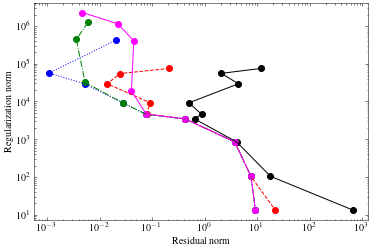

In [16]:
%matplotlib inline

plt.plot(rns[0], ns[0], 'black')
plt.scatter(rns[0], ns[0], color='black')
plt.plot(rns[1], ns[1], 'red')
plt.scatter(rns[1], ns[1], color='red')
plt.plot(rns[2], ns[2], 'blue')
plt.scatter(rns[2], ns[2], color='blue')
plt.plot(rns[3], ns[3], 'green')
plt.scatter(rns[3], ns[3], color='green')
plt.plot(rns[4], ns[4], 'magenta')
plt.scatter(rns[4], ns[4], color='magenta')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Residual norm")
plt.ylabel("Regularization norm")

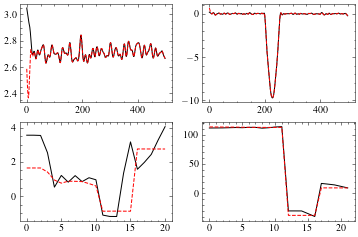

In [18]:
# lam1=1e-3, lam2=1
plt.subplot(221)
plt.plot(us[2][4][43::2])
plt.plot(us[-1][4][43::2])
plt.subplot(222)
plt.plot(us[2][4][44::2])
plt.plot(us[-1][4][44::2])
plt.subplot(223)
plt.plot(us[2][4][:21])
plt.plot(us[-1][4][:21])
plt.subplot(224)
plt.plot(us[2][4][21:43])
plt.plot(us[-1][4][21:43])

# Simulated impulse excitation test

(1000, 43)


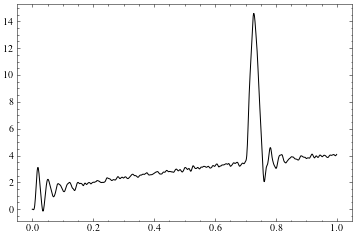

In [19]:
t_sim_short = t_sim[:1000]
excitation_sim = impulse_sim[2500:3500]
tout_sim_imp, yout_sim_imp, xout_sim_imp = dlsim((A, B, C, D, 1e-3), excitation_sim, t=t_sim_short)
print(xout_sim_imp.shape)

plt.plot(tout_sim_imp, yout_sim_imp[:,-1])

In [20]:
# HP IMPULSE
# measurement data from the encoder 1, encoder 2, torque transducer 1 and torque transducer 2
lam_imp1 = 1e-1
lam_imp2 = 10
batch_size = 500
measurements_sim_imp = yout_sim_imp[:,:-1] + np.random.normal(0, .1, yout_sim_imp[:,:-1].shape)
estimates_imp_sim, state_ests = ell2_analytical(
    ss, ss2, measurements_sim_imp, batch_size, 0, t_sim_short, lam1=lam_imp1, lam2=lam_imp2, use_trend_filter=True
)

Calculating estimates: [██] 2/2



(2000, 1)


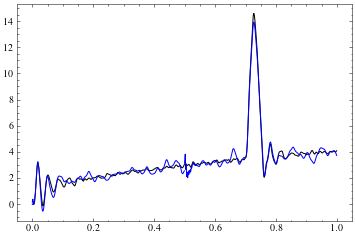

In [21]:
print(state_ests[0].shape)
plt.plot(tout_sim_imp, yout_sim_imp[:,-1])
plt.plot(t_sim[:500], state_ests[0][3::4], 'b-')
plt.plot(t_sim[500:1000], state_ests[1][3::4], 'b-')

In [23]:
motor_estimates_imp_sim = np.vstack((estimates_imp_sim[0][43::2], estimates_imp_sim[1][43::2]))
propeller_estimates_imp_sim = np.vstack((estimates_imp_sim[0][44::2], estimates_imp_sim[1][44::2]))
initial_state_estimate = estimates_imp_sim[1][:43]
initial_speeds = initial_state_estimate[21:]
initial_torques = initial_state_estimate[:21]

U_est_imp_sim = np.hstack((motor_estimates_imp_sim, propeller_estimates_imp_sim))
#C_full = np.eye(A.shape[1])
#D_full = np.zeros((C_full.shape[0], B.shape[1]))
tout_imp_sim, yout_imp_sim, _ = dlsim((A, B, C, D, dt), U_est_imp_sim, t=t_sim_short)

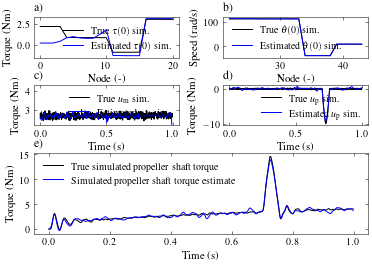

In [24]:
# Create a figure
fig = plt.figure(figsize=(6, 4))

# Define the grid layout with 3 rows and 2 columns
gs = gridspec.GridSpec(3, 2, height_ratios=[0.5, 0.5, 1])

# Create the first four subplots (2x2 grid)
ax1 = fig.add_subplot(gs[0, 0])  # Row 0, Column 0
ax2 = fig.add_subplot(gs[0, 1])  # Row 0, Column 1
ax3 = fig.add_subplot(gs[1, 0])  # Row 1, Column 0
ax4 = fig.add_subplot(gs[1, 1])  # Row 1, Column 1

# Create the bottom subplot that spans both columns
ax5 = fig.add_subplot(gs[2, :])  # Row 2, spans all columns

# Plot data
ax1.plot(np.arange(0, 21, 1), xout_sim_imp[500,:][:21], label=r'True $\tau(0)$ sim.')
ax1.plot(np.arange(0, 21, 1), initial_torques, 'b-', label=r'Estimated $\tau(0)$ sim.')
ax1.set_xlabel("Node (-)", fontsize=11)
ax1.set_ylabel("Torque (Nm)", fontsize=11)
ax1.legend()
ax1.minorticks_off()
ax2.plot(np.arange(22, 44, 1), xout_sim_imp[500,:][21:], label=r'True $\dot{\theta}(0)$ sim.')
ax2.plot(np.arange(22, 44, 1), initial_speeds, 'b-', label=r'Estimated $\dot{\theta}(0)$ sim.')
ax2.set_xlabel("Node (-)", fontsize=11)
ax2.set_ylabel("Speed (rad/s)", fontsize=11)
ax2.legend()
ax2.minorticks_off()

ax3.plot(t_sim_short, excitation_sim[:,0], label=r'True $u_{\mathrm{m}}$ sim.')
ax3.plot(t_sim_short, motor_estimates_imp_sim, 'b-', label=r'Estimated $u_{\mathrm{m}}$ sim.')#'Simulated driving motor input estimate')
ax3.set_xlabel("Time (s)", fontsize=11)
ax3.set_ylabel("Torque (Nm)", fontsize=11)
ax3.set_ylim(2.2, 4.3)
ax3.legend()
ax3.minorticks_off()
ax4.plot(t_sim_short, excitation_sim[:,1], label=r'True $u_{\mathrm{p}}$ sim.')
ax4.plot(t_sim_short, propeller_estimates_imp_sim, 'b-', label=r'Estimated $u_{\mathrm{p}}$ sim.')
ax4.set_xlabel("Time (s)", fontsize=11)
ax4.set_ylabel("Torque (Nm)", fontsize=11)
ax4.legend()
ax4.minorticks_off()

ax5.plot(t_sim_short, yout_sim_imp[:,-1], label="True simulated propeller shaft torque")
ax5.plot(tout_imp_sim, yout_imp_sim[:,-1], '-', c='b', label="Simulated propeller shaft torque estimate")
ax5.set_xlabel("Time (s)", fontsize=11)
ax5.set_ylabel("Torque (Nm)", fontsize=11)
ax5.legend()
ax5.minorticks_off()

# Add some titles or labels for clarity
ax1.set_title('a)', loc='left', fontsize=12)
ax2.set_title('b)', loc='left', fontsize=12)
ax3.set_title('c)', loc='left', fontsize=12)
ax4.set_title('d)', loc='left', fontsize=12)
ax5.set_title('e)', loc='left', fontsize=12)

# Adjust the layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show the plot
plt.savefig("uh1_figures/simulated_impulse_estimates.pdf")
plt.show()

# Testbench ice experiment

In [25]:
# The motor dataset columns:
# | time | motor setpoint | motor | propeller setpoint | propeller |
motor_data = np.loadtxt("../data/masters_data/processed_data/ice_2000_motor.csv", delimiter=",")

# The sensor dataset columns:
# | time | speed1 (encoder1) | speed2 (encoder2) | torque1 | torque2 |
sensor_data = np.loadtxt("../data/masters_data/processed_data/ice_2000_sensor.csv", delimiter=",")

In [26]:
time = sensor_data[:,0]
measurements = sensor_data[:,1:] # measurement data from the encoder 1, encoder 2, torque transducer 1 and torque transducer 2
motors = np.vstack((motor_data[:,2], motor_data[:,4])).T # motor torque data

motor_setpoint = motor_data[:,1]
propeller_setpoint = motor_data[:,3]
motor = motors[:,0]
propeller = motors[:,-1]

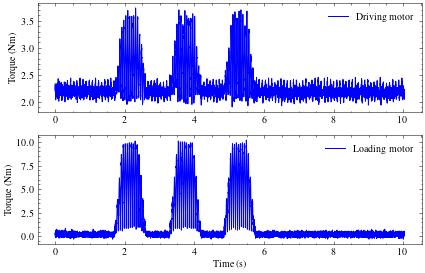

In [27]:
plt.subplot(211)
plt.plot(time, motor, label='Driving motor', color='blue')
plt.ylabel('Torque (Nm)')
plt.legend()

plt.subplot(212)
plt.plot(time, propeller, label='Loading motor', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.legend()
plt.tight_layout()

plt.show()

In [28]:
def process_estimates(n_batches, estimates, nstates=43):
    """
    Here the input and initial state estimates are processed.
    Overlapped sections are discarded and the input estimate batches are stacked one after the other.
    """
    motor_estimates, propeller_estimates = [], []
    motor_est_overlap, prop_est_overlap = [], []
    for i in range(n_batches):
        if i == 0:
            all_motor_estimates = estimates[i][nstates::2]
            motor_est_overlap.append(all_motor_estimates)
            motor_estimates = all_motor_estimates[:-2]
            all_propeller_estimates = estimates[i][(nstates+1)::2]
            prop_est_overlap.append(all_propeller_estimates)
            propeller_estimates = all_propeller_estimates[:-2]
        else:
            all_motor_estimates = estimates[i][nstates::2]
            motor_est_overlap.append(all_motor_estimates)
            motor_estimates = np.concatenate(
                (motor_estimates, all_motor_estimates[1:-1])
            )
            all_propeller_estimates = estimates[i][(nstates+1)::2]
            prop_est_overlap.append(all_propeller_estimates)
            propeller_estimates = np.concatenate(
                (propeller_estimates, all_propeller_estimates[1:-1])
            )
    
    return motor_estimates, propeller_estimates, estimates[i][:44]

In [38]:
# ICE
# measurement data from the encoder 1, encoder 2, torque transducer 1 and torque transducer 2
lam_imp1 = 1e-2
lam_imp2 = 10
batch_size = 500
estimates_imp, state_imp = ell2_analytical(
    ss, ss2, measurements[:,:3], batch_size, 1, time, lam1=lam_imp1, lam2=lam_imp2, use_trend_filter=True
)
estimates_no_xreg = ell2_analytical_no_xreg(
    ss, measurements[:,:3], batch_size, 1, time, lam1=0, lam2=lam_imp2, use_trend_filter=True
)

Calculating estimates: [████████████████████] 20/20

Calculating estimates: [████████████████████] 20/20



In [39]:
motor_estimates_imp, propeller_estimates_imp, final_x = process_estimates(len(estimates_imp), estimates_imp)
motor_estimates_no_xreg, propeller_estimates_no_xreg, final_x2 = process_estimates(len(estimates_no_xreg), estimates_no_xreg, nstates=0)

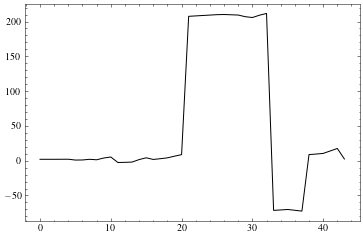

In [40]:
plt.plot(final_x)

In [41]:
ice_state_estimates = np.concatenate(state_imp)
print(ice_state_estimates.shape)
t2_estimates = ice_state_estimates[3::4]

(40160, 1)


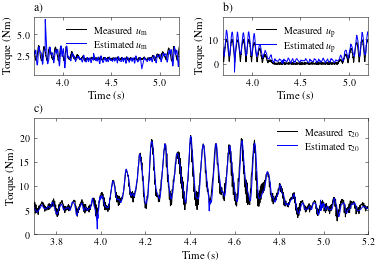

In [48]:
%matplotlib inline
fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(2, 2, height_ratios=[0.5, 1])
ax1 = fig.add_subplot(gs[0, 0])  # Row 1, Column 1
ax2 = fig.add_subplot(gs[0, 1])  # Row 1, Column 2
ax5 = fig.add_subplot(gs[1, :])  # Row 2, spans all columns

ax1.plot(motor_data[:,0], motor_data[:,2], color='black', label=r'Measured $u_{\mathrm{m}}$')
ax1.plot(time[:-(67+665)], motor_estimates_imp[665:], 'b-', label=r'Estimated $u_{\mathrm{m}}$')
ax1.set_xlabel("Time (s)", fontsize=11)
ax1.set_ylabel("Torque (Nm)", fontsize=11)
ax1.set_xlim(3.7,5.2)
ax1.legend()
ax1.minorticks_off()

ax2.plot(motor_data[:,0], motor_data[:,4], c='black', label=r'Measured $u_{\mathrm{p}}$')
ax2.plot(time[:-(67+665)], -propeller_estimates_imp[665:], 'b-', label=r'Estimated $u_{\mathrm{p}}$')
ax2.set_xlabel("Time (s)", fontsize=11)
ax2.set_ylabel("Torque (Nm)", fontsize=11)
ax2.set_xlim(3.7,5.2)
ax2.legend()
ax2.minorticks_off()

ax5.plot(time, measurements[:,-1], c='black', label=r'Measured $\tau_{20}$')
ax5.plot(time[:-42], t2_estimates[15:], 'b-', label=r'Estimated $\tau_{20}$')
ax5.set_xlabel("Time (s)", fontsize=11)
ax5.set_ylabel("Torque (Nm)", fontsize=11)
ax5.set_xlim(3.7,5.2)
ax5.legend()
ax5.minorticks_off()

# Add some titles or labels for clarity
ax1.set_title('a)', loc='left', fontsize=12)
ax2.set_title('b)', loc='left', fontsize=12)
ax5.set_title('c)', loc='left', fontsize=12)

# Adjust the layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show the plot
#plt.savefig("uh1_figures/simulated_impulse_estimates.pdf")
plt.show()

In [34]:
# Excitation matrix using estimated input torques
U_est_imp = np.hstack((motor_estimates_imp, propeller_estimates_imp))
U_est_no_xreg = np.hstack((motor_estimates_no_xreg, propeller_estimates_no_xreg))

In [35]:
# The testbench is simulated using the estimated input torques, with zero initial state.
print(U_est_imp.shape)
print(time.shape)
tout_imp, yout_imp, _ = dlsim((A, B, C, D, dt), U_est_imp, t=time[:-67])
tout_no_xreg, yout_no_xreg, _ = dlsim((A, B, C, D, dt), U_est_no_xreg, t=time[:-67])

(10000, 2)
(10067,)


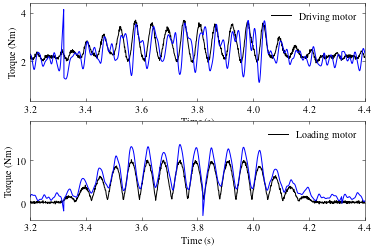

In [36]:
%matplotlib inline
plt.subplot(211)
plt.plot(motor_data[:,0], motor_data[:,2], label='Driving motor', color='black')
#plt.plot(time[:-(67+665)], motor_estimates_no_xreg[665:], 'g-')
plt.plot(time[:-(67+665)], motor_estimates_imp[665:], 'b-')
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.xlim(3.2,4.4)
plt.minorticks_off()
plt.legend()

plt.subplot(212)
plt.plot(motor_data[:,0], motor_data[:,4], label='Loading motor', color='black')
#plt.plot(time[:-(67+665)], -propeller_estimates_no_xreg[665:], 'g-')
plt.plot(time[:-(67+665)], -propeller_estimates_imp[665:], 'b-')
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.xlim(3.2,4.4)
plt.minorticks_off()
plt.legend()

## Motor measurements not in sync

(2.0, 22.0)

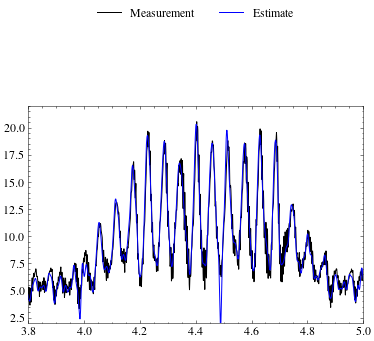

In [37]:
%matplotlib inline
plt.plot(time, measurements[:,-1], c='black', label="Measurement")
#plt.plot(tout_imp, yout_no_xreg[:,-1], 'gray', label="Estimate")
plt.plot(tout_imp, yout_imp[:,-1], 'b-', label="Estimate")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(
    loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fancybox=True, shadow=False, fontsize=12
)
plt.xlim(3.8,5)
plt.ylim(2,22)

# Ice experiment data processing tests

In [ ]:
ice_motor_data_path = "ice_experiment_data/ice_motor.csv"
motor_data = np.loadtxt(ice_motor_data_path, delimiter=',', skiprows=1)

cl, cr = 25000, -27000

motor_times = motor_data[cl:cr,0]
#motor_times = motor_times-motor_times[0]
motor_torque = motor_data[cl:cr,2]
propeller_torque = motor_data[cl:cr,6]

In [ ]:
print(motor_times[-1])
print("Motor sampling freq. :", 1/np.mean(np.diff(motor_times)))

In [ ]:
ice_sensor_data_path = "ice_experiment_data/ice_sensor.csv"
sensor_data = np.loadtxt(ice_sensor_data_path, delimiter=',', skiprows=1)

# conversion factors
tts = 25e-9  # timestamps to seconds
atr = 2*np.pi/2e4  # encoder angles to radians
vtt1 = 4  # volts to torque 1
vtt2 = 10  # volts to torque 2

sensor_times = sensor_data[75000:-81000:3,0]
sensor_times0 = (sensor_times-sensor_times[0])*tts

#enc1 = sensor_data[:,1]
#enc1_time = sensor_data[:,2]
#enc2 = sensor_data[:,3]
#enc2_time = sensor_data[:,4]

torque1 = sensor_data[75000:-81000:3,-2]*vtt1
torque2 = sensor_data[75000:-81000:3,-1]*vtt2

In [ ]:
print(sensor_times0[-1])
print("Sensors sampling freq. :", 1/np.mean(np.diff(sensor_times0)))

In [ ]:
from scipy.signal import resample

# Original sampling frequency and data
fs_old = 3012  # Original sampling frequency (3012 Hz)
fs_new = 993   # Target sampling frequency (993 Hz)

# Calculate the number of new samples needed for the new sampling frequency
num_samples_old = len(torque1)
num_samples_new = int(num_samples_old * fs_new / fs_old)

# Resample the signal to the new number of samples
torque1_resampled = resample(torque1, num_samples_new)
torque2_resampled = resample(torque2, num_samples_new)

# New time vector for the resampled signal
t_new = np.arange(0, 1, 1/fs_new)

# Print the new number of samples and new sampling frequency
print(f"Original number of samples: {num_samples_old}")
print(f"Resampled number of samples: {num_samples_new}")
print(f"New Sampling Frequency: {fs_new} Hz")

In [ ]:
%matplotlib inline
plt.subplot(211)
plt.plot(motor_torque)
plt.plot(torque1, 'b-')
plt.subplot(212)
plt.plot(propeller_torque)
plt.plot(torque2, 'b-')